# COMP20008 Workshop Week 7

# Correlation and Mutual Information 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Pearson Correlation Example

        X      Y
0    1000  100.0
1    2500  105.0
2    3000   80.0
3    5000   77.0
4    6000   74.0
5    9000   70.0
6   11000   65.0
7   14000   63.0
8   18000   62.0
9   19000   61.0
10  19500   60.5
11  22000   55.0


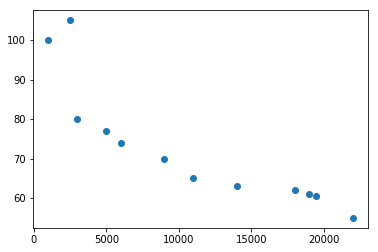

Pearson r is  -0.869369682872075


In [2]:
d = pd.DataFrame.from_dict({'X' : [1000,2500,3000,5000,6000,9000,11000,14000,18000,19000,19500,22000],  'Y' :[100,105,80,77,74,70,65,63,62,61,60.5,55]})
print(d)
plt.scatter(d.loc[:,'X'],d.loc[:,'Y'])
plt.show()

print("Pearson r is ",d['X'].corr(d['Y']))



# Entropy Example

In [3]:
def my_entropy(probs):
   
    return -probs.dot(np.log2(probs))

d =pd.DataFrame.from_dict({'X' : [1,1,1,1,2,2,2,2,3,3,3,3],  'Y' :[4,4,4,3,3,3,2,2,2,1,1,1]})
print("H(X)",my_entropy(d['X'].value_counts(normalize=True, sort=False)))
print("H(Y)",my_entropy(d['Y'].value_counts(normalize=True, sort=False)))

H(X) 1.584962500721156
H(Y) 2.0


# Mutual Information Example

In [4]:
def mutual_info(df):
    
    Hx = my_entropy(df.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = my_entropy(df.iloc[:,1].value_counts(normalize=True, sort=False))
    
    
    counts = d.groupby(["X","Y"]).size()
    probs = counts/ counts.values.sum()
    H_xy = my_entropy(probs)

    # Mutual Information
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) #I_xy/np.sqrt(H_x*H_y)
    
    
    return {'Hx':Hx,'Hy':Hy,'MI':MI,'NMI':NMI} 

d =pd.DataFrame.from_dict({'X' : [1,1,1,1,2,2,2,2,3,3,3,3],  'Y' :[4,4,4,3,3,3,2,2,2,1,1,1]})
mutual_info(d)

{'Hx': 1.584962500721156,
 'Hy': 2.0,
 'MI': 1.1258145836939115,
 'NMI': 0.7103099178571526}